## Smart or Starving: How Does County Education Influence Poverty Rates? #
#### A Tutorial #
##### (James) Matthew Island<br>CMSC320<br>December 12, 2022 #

### 1. Introduction #

Pursuing a higher education is one of the most reliable ways of securing a high-paying career in the modern day. Most companies require some sort of four year degree or certification from an accredited university as a threshold for "white collar" work-- and salary. A college degree isn't always necessary for a high salary, though-- society depends upon work which requires little to no college education, and some tradesmen and tradeswomen are paid well for the importance of their work. Electricians, construction workers, and auto repair mechanics (just to name a few) can secure very lucrative salaries in their respecitve fields. However, sometimes circumstances in an area can create an environment where citizens don't have access to quality education-- at the college *or* high school level-- which they need in order to succeed financially. These circumstances could be economic recession; high levels of crime; inadequate funding for public resources; any number of societal blights.

The initial questions which this tutorial aimed to answer were these: how well might the level of education in a given county within the (contiguous) United States predict that county's levels of poverty? Does higher rates and levels of education strictly create a less poverty-prone county, or is a balance between high-school-only education and college-level education the best environment for lower rates of poverty?

### 2. Data #
Firstly, let's import the necessary packages for collecting our data.

In [2]:
import pandas
import numpy

Now, we load in our independent variable-- rates of educational achievement in the U.S. by county. The [dataset](https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/#:~:text=Educational%20attainment%20for%20adults%20age%2025%20and%20older%20for%20the%20U.S.%2C%20States%2C%20and%20counties%2C%201970%E2%80%932020) we will be using for this metric was collected by the U.S. Census Bureau, and was made presentable by the USDA. Despite the size of the data, the USDA packaged everything into one table, which outlines the rate of educational achievement by county with the following relevant columns:
1. **FIPS Code**<br>
This code is a unique five-digit ID assigned to each county in the U.S. The first two digits represent state. For example, Alabama's FIPS code is 01000, and Maryland's is 24000. The remaining three digits are a unique code for each county in the state.
2. **State**<br>
The state the county belongs to.
3. **Area Name**<br>
The name of the county.
4. **Percent of Adults with Less than a High School Diploma (1970, 1980, 1990, 2000, 2007-11, 2016-20)**<br>
The percent of adults 25 years or older whose educational level is below a high school graduate. There is a seperate column for each year grouping listed above.
5. **Percent of Adults with a High School Diploma Only (1970, 1980, 1990, 2000, 2007-11, 2016-20)** <br>
The percent of adults 25 years or older who have graduated high school, but have no further formal education beyond that. There is a seperate column for each year grouping listed above.
6. **Percent of Adults Completing Some College (1970, 1980, 1990, 2000, 2007-11, 2016-20)** <br>
The percent of adults 25 years or older who have completed between one to three years of college. There is a seperate column for each year grouping listed above.
7. **Percent of Adults Completing Four Years of College or Higher (1970, 1980, 1990, 2000, 2007-11, 2016-20)** <br>
The percent of adults 25 years or older who have completed four years or more of college. There is a seperate column for each year grouping listed above.

The data also has the raw numbers for each of the counties by year, but the percentages have contextualized the raw number of citizens in each category by the population of the county, and more can be inferred from the percentage, so we will be using those columns.

In [3]:
# We set header = 5, since the column titles in the CSV file aren't specified until row 5.
df = pandas.read_csv("Education.csv", header = 5)

df.head()

,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2007-11",Percent of adults with a bachelor's degree or higher 2007-11,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20","Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,28.6,28.2,"25,562,680","59,421,419","64,496,416","73,356,319",11.5,26.7,28.9,32.9
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,28.5,22.0,"438,947","1,014,342","1,013,673","877,044",13.1,30.3,30.3,26.2
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,29.8,21.6,"4,273","11,880","10,986","10,721",11.3,31.4,29.0,28.3
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,31.5,27.2,"14,823","42,272","48,832","49,636",9.5,27.2,31.4,31.9
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,25.5,13.9,"4,497","6,361","4,872","2,067",25.3,35.7,27.4,11.6


Since this analysis is of the contiguous United States, we will eliminate data regarding Alaska, Hawaii, and Puerto Rico (this is done because the data on the county levels for these states is sparse). We will also eliminate the United States as an entry as well:

In [4]:
print(df['State'].unique())

['US' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'PR']


In [5]:
# We want to eliminate counties labeled in these 'states': 'US', 'AK', 'HI', and 'PR'.
df.drop(df[(df['State'] == 'AK') | (df['State'] == 'HI') | (df['State'] == 'US') | (df['State'] == 'PR')].index, inplace=True)

print(df['State'].unique())

['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH'
 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


Now, we want to get rid of all the state rows, since this analysis will be at the county level. The state rows are the only rows with 'NaN' under the '2003 Rural-urban Continuum Code' column, so we will omit any null entries in that column.

In [6]:
rows_before_delete = len(df)
df = df.dropna(subset = ['2003 Rural-urban Continuum Code'])
rows_deleted = rows_before_delete - len(df)
print('Rows Deleted: {}'.format(rows_deleted))

Rows Deleted: 49


49 rows were deleted-- the 49 contiguous state entries (including DC). Now our independant variable dataset only holds county data. Finally, to finish cleaning the dataset, we can eliminate the irrelevant columns:

In [7]:
# First, the data irrelevant to the analysis:
df = df.drop(['2003 Rural-urban Continuum Code', '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'], axis = 1)
# Next, the raw counts for each educational category per year:
df = df.drop(df.columns[[3, 4, 5, 6, 11, 12, 13, 14, 19, 20, 21, 22, 27, 28, 29, 30, 35, 36, 37, 38, 43, 44, 45, 46]], axis = 1)
df.head()

,Federal Information Processing Standard (FIPS) Code,State,Area name,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with a high school diploma only, 2007-11","Percent of adults completing some college or associate's degree, 2007-11",Percent of adults with a bachelor's degree or higher 2007-11,"Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19
2,1001,AL,Autauga County,54.8,31.1,7.7,6.4,40.6,35.2,12.1,...,26.9,18.0,13.5,35.0,29.8,21.6,11.3,31.4,29.0,28.3
3,1003,AL,Baldwin County,59.4,26.7,7.4,6.5,39.7,33.7,14.5,...,29.3,23.1,12.1,29.1,31.5,27.2,9.5,27.2,31.4,31.9
4,1005,AL,Barbour County,68.8,19.0,4.9,7.3,55.1,26.1,9.7,...,21.3,10.9,27.6,33.0,25.5,13.9,25.3,35.7,27.4,11.6
5,1007,AL,Bibb County,73.1,19.4,3.3,4.2,59.5,29.6,6.1,...,20.4,7.1,24.1,41.9,24.1,9.8,19.1,45.1,24.5,11.3
6,1009,AL,Blount County,70.5,22.7,4.1,2.7,53.9,32.4,8.4,...,24.8,9.6,26.8,36.0,25.9,11.3,17.2,35.1,34.5,13.3


Now, that extraneous data is eliminated, let's restructure the dataset so that each entry represents a unique county-year combo; instead of having one row with all of a county's data from 1970-2020, each county will have six rows, one for each era (1970, 1980, 1990, 2000, 2010(2007-11), and 2020(2016-20)).

In [8]:
df_temp = df
df = pandas.DataFrame({'FIPS Code': [],
                      'State': [],
                      'Name': [],
                      'Year': [],
                      '< HS': [],
                      '= HS': [],
                      '< Uni': [],
                      '= Uni': []})

for index, row in df_temp.iterrows():
    prefix = row.to_numpy()[0 : 3]
    seventies_data = row.to_numpy()[3 : 7]
    eighties_data = row.to_numpy()[7 : 11]
    nineties_data = row.to_numpy()[11 : 15]
    aughts_data = row.to_numpy()[15 : 19]
    seven_eleven_data = row.to_numpy()[19 : 23]
    sixteen_twenty_data = row.to_numpy()[23 : 27]
    
    # Now add 6 new rows for every row in df, one for each time frame.
    # 1970's:
    tmp_row = numpy.append(prefix, 1970)
    df.loc[len(df.index)] = numpy.append(tmp_row, seventies_data)
    # 1980's:
    tmp_row = numpy.append(prefix, 1980)
    df.loc[len(df.index)] = numpy.append(tmp_row, eighties_data)
    # 1990's:
    tmp_row = numpy.append(prefix, 1990)
    df.loc[len(df.index)] = numpy.append(tmp_row, nineties_data)
    # 2000's:
    tmp_row = numpy.append(prefix, 2000)
    df.loc[len(df.index)] = numpy.append(tmp_row, aughts_data)
    # We'll simplify 2007-2012 to the year 2010, for the purposes of keeping this column of type int:
    tmp_row = numpy.append(prefix, 2010)
    df.loc[len(df.index)] = numpy.append(tmp_row, seven_eleven_data)
    # For the same reason as above, we'll denote 2016-2020 as 2020:
    tmp_row = numpy.append(prefix, 2020)
    df.loc[len(df.index)] = numpy.append(tmp_row, sixteen_twenty_data)

df.head(14)

,FIPS Code,State,Name,Year,< HS,= HS,< Uni,= Uni
0,1001,AL,Autauga County,1970,54.8,31.1,7.7,6.4
1,1001,AL,Autauga County,1980,40.6,35.2,12.1,12.1
2,1001,AL,Autauga County,1990,30.0,32.0,23.5,14.5
3,1001,AL,Autauga County,2000,21.3,33.8,26.9,18.0
4,1001,AL,Autauga County,2010,13.5,35.0,29.8,21.6
5,1001,AL,Autauga County,2020,11.3,31.4,29.0,28.3
6,1003,AL,Baldwin County,1970,59.4,26.7,7.4,6.5
7,1003,AL,Baldwin County,1980,39.7,33.7,14.5,12.1
8,1003,AL,Baldwin County,1990,26.8,31.8,24.6,16.8
9,1003,AL,Baldwin County,2000,18.0,29.6,29.3,23.1


Note here the column name changes. Instead of long column titles, we will be using the following shorthand to refer to the county features:
- Percent of adults with less than a high school diploma &#8594; **< HS**
- Percent of adults with a high school diploma only &#8594; **= HS**
- Percent of adults completing some college &#8594; **< Uni**
- Percent of adults completing four years of college or higher &#8594; **= Uni**

Okay, our features are ready. Now, time to introduce the dependent variable: poverty data by county. I retrieved the datasets for this metric from the U.S. Census Bureau, and due to the size of the data, I was only able to download them seperately by decade. The datasets from 1970-2000 were retrieved [here](https://www.census.gov/data/tables/time-series/dec/census-poverty.html), and the data from 2012-2020 can be found [here](https://www.census.gov/data-tools/demo/saipe/#/?s_state=01,04,05,06,08,09,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&map_yearSelector=2020&s_county=&s_district=).

Let's start by adding the data from 1970-2000 to the dataset. We are looking for the column *'Percent below poverty level'*, which contains the percent of the population for a given county which is under the poverty line.

In [9]:
new_col = numpy.full(len(df), numpy.nan)
df.insert(8, '% Poverty', new_col, True)

seventies_poverty = pandas.read_csv('1970_Poverty.csv', header = 4, dtype = {'Percent below poverty level': numpy.float64}, na_values = {"-", '…'})
seventies_poverty = seventies_poverty.dropna(subset = ['State/ County Codes'])

eighties_poverty = pandas.read_csv('1980_Poverty.csv', header = 4, dtype = {'Percent below poverty level': numpy.float64}, na_values = {"-", '…'})
eighties_poverty = eighties_poverty.dropna(subset = ['State/ County Codes'])

# For some reason, the 90's poverty dataset is formatted differently, with a ranking of high-to-low poverty counties at the beginning and end of the file, and data grouped
# by state in between. To avoid duplicate entries, we'll adjust the header parameter in read_csv(), and use the skipfooter option to cut out the bottom of the file.
nineties_poverty = pandas.read_csv('1990_Poverty.csv', header = 3154, skipfooter = 3383, engine = 'python', dtype = {'Percent below poverty level': numpy.float64}, na_values = {"-", '…'})
nineties_poverty = nineties_poverty.dropna(subset = ['State/ County Codes'])

aughts_poverty = pandas.read_csv('2000_Poverty.csv', header = 4, dtype = {'Percent below poverty level': numpy.float64}, na_values = {"-", '…'})
aughts_poverty = aughts_poverty.dropna(subset = ['State/ County Codes'])

twelve_twenty_poverty = pandas.read_csv('2012-20_Poverty.csv', dtype = {'Percent in Poverty': numpy.float64}, na_values = {"-", '…'})

for index, row in df.iterrows():
    if (row['Year'] == 1970):
        dat = seventies_poverty.loc[seventies_poverty['State/ County Codes'] == row['FIPS Code']]['Percent below poverty level'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]
    if (row['Year'] == 1980):
        dat = eighties_poverty.loc[eighties_poverty['State/ County Codes'] == row['FIPS Code']]['Percent below poverty level'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]
    if (row['Year'] == 1990):
        dat = nineties_poverty.loc[nineties_poverty['State/ County Codes'] == row['FIPS Code']]['Percent below poverty level'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]
    if (row['Year'] == 2000):
        dat = aughts_poverty.loc[aughts_poverty['State/ County Codes'] == row['FIPS Code']]['Percent below poverty level'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]
    if (row['Year'] == 2010):
        dat = twelve_twenty_poverty.loc[(twelve_twenty_poverty['ID'] == row['FIPS Code']) & (twelve_twenty_poverty['Year'] == 2012)]['Percent in Poverty'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]
    if (row['Year'] == 2020):
        dat = twelve_twenty_poverty.loc[(twelve_twenty_poverty['ID'] == row['FIPS Code']) & (twelve_twenty_poverty['Year'] == 2020)]['Percent in Poverty'].values
        if (len(dat >= 1)):
            df.at[index, '% Poverty'] = dat[0]

df.head(10)

,FIPS Code,State,Name,Year,< HS,= HS,< Uni,= Uni,% Poverty
0,1001,AL,Autauga County,1970,54.8,31.1,7.7,6.4,23.70
1,1001,AL,Autauga County,1980,40.6,35.2,12.1,12.1,16.62
2,1001,AL,Autauga County,1990,30.0,32.0,23.5,14.5,15.70
3,1001,AL,Autauga County,2000,21.3,33.8,26.9,18.0,10.90
4,1001,AL,Autauga County,2010,13.5,35.0,29.8,21.6,12.70
5,1001,AL,Autauga County,2020,11.3,31.4,29.0,28.3,11.20
6,1003,AL,Baldwin County,1970,59.4,26.7,7.4,6.5,22.60
7,1003,AL,Baldwin County,1980,39.7,33.7,14.5,12.1,16.23
8,1003,AL,Baldwin County,1990,26.8,31.8,24.6,16.8,14.30
9,1003,AL,Baldwin County,2000,18.0,29.6,29.3,23.1,10.10


In [10]:
old_rows = len(df)
# Delete counties with NaN in any year's '% Poverty' column-- counties from the Education file with missing data in the Poverty files.
for index, row in df.iterrows():
    if (numpy.isnan(row['% Poverty'])):
        df = df[df['FIPS Code'] != row['FIPS Code']]
print('Deleted Rows w/ NaN: {}'.format((old_rows - len(df))))

Deleted Rows w/ NaN: 96


Now our dataset is ready for representation and analysis!

### 3. Data Analysis and Hypothesis Testing #
To explore which mode of education has the most significant impact on rate of poverty in a county, we will plot the data entered above.<br>

Before we start, lets import our data visualization packages:

In [12]:
import matplotlib.pyplot as plt
from importlib import reload
import statsmodels.api as sm

The first thing we should identify from the data is the effect of year on poverty rates. Did certain years/eras experience outside factors which influenced the impact of educational levels on poverty rates? If there appears to be no general relationship between year and poverty, then we can compare county data across years equally. However, if the year does influence the distribution of poverty, we may have to create an interaction term for year.<br>

To visualize the effect of year on poverty, we'll implement a violin plot:

Text(0.5, 1.0, '% of County Population in Poverty by Year')

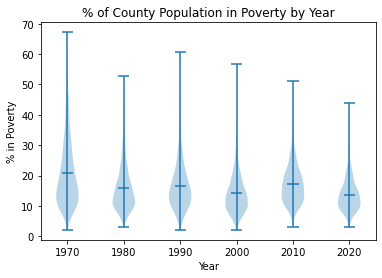

In [13]:
pov_per_year = []
for index in [1970, 1980, 1990, 2000, 2010, 2020]:
    data_by_year = df.loc[df['Year'] == index]
    arr = data_by_year['% Poverty'].values
    pov_per_year.append(arr)

plt = reload(plt)
fig, ax = plt.subplots()
ax.violinplot(pov_per_year,df['Year'].unique(),widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("% in Poverty")
ax.set_title("% of County Population in Poverty by Year")

Looking at the shape of the distribution, each year seems to be skewed to the right for percentage of poverty; a small number of counties each year are extraordinarily high in poverty. This indicates that the mean-- the center line in each violin plot-- may be a slightly less reliable measure of central tendency than the median. Let's re-render the plot, but showing the medians:

Text(0.5, 1.0, '% of County Population in Poverty by Year')

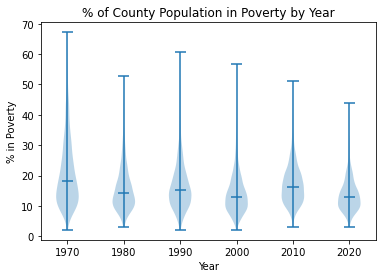

In [14]:
plt = reload(plt)
fig, ax = plt.subplots()
ax.violinplot(pov_per_year,df['Year'].unique(),widths=4,showmeans=False,showmedians=True)
ax.set_xlabel("Year")
ax.set_ylabel("% in Poverty")
ax.set_title("% of County Population in Poverty by Year")

It looks as if there is little general influence on the distribution of poverty rates between years. The median does not demonstrate a trend in any particular direction between the years, and the distribution stays largely the same. To be sure, though, let's fit a line of regression on the plot.

Slope: -0.09693872144011059


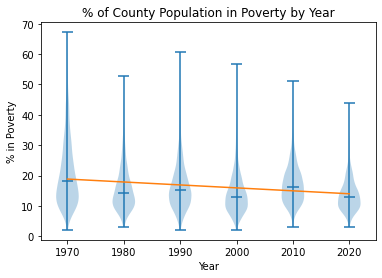

In [15]:
plt = reload(plt)
fig, ax = plt.subplots()
ax.violinplot(pov_per_year,df['Year'].unique(),widths=4,showmeans=False,showmedians=True)
ax.set_xlabel("Year")
ax.set_ylabel("% in Poverty")
ax.set_title("% of County Population in Poverty by Year")
m, b = numpy.polyfit(list(df['Year'].values), list(df['% Poverty'].values), 1)
plt.plot(df['Year'].values, m*(df['Year'].values)+b)

print('Slope: {}'.format(m))

Okay, the line of regression is slightly sloped downwards-- we can verify this because the value of 'm', the slope, is negative: -0.09693. This suggests that % Poverty within counties, from our data, is slightly decreasing. However, is it decreasing at such a rate by year that we need to account for year when comparing two points? Let's do a hypothesis test:

In [16]:
# It turns out that '%' in variable names is read as the modulo operator, and causes statsmodels (ols) to throw an AssertionError. To avoid this issue moving forward, I'll
# replace the column name appropriately. We'll fix all symbol-related column names as well.
df.rename(columns={'% Poverty': 'Percent_Poverty'}, inplace=True)
df.rename(columns={'< HS': 'less_HS'}, inplace=True)
df.rename(columns={'= HS': 'eq_HS'}, inplace=True)
df.rename(columns={'< Uni': 'less_Uni'}, inplace=True)
df.rename(columns={'= Uni': 'eq_Uni'}, inplace=True)

# Also, quick fix to the typing of the columns for use of statsmodels:
df['Percent_Poverty'] = df['Percent_Poverty'].values.astype('float64')
df['Year'] = df['Year'].values.astype('int')

In [17]:
Y = df['Percent_Poverty'].values
X = df['Year'].values
X = sm.add_constant(X)


model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     824.0
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          2.44e-177
Time:                        23:37:54   Log-Likelihood:                -64635.
No. Observations:               18570   AIC:                         1.293e+05
Df Residuals:                   18568   BIC:                         1.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.8221      6.738     31.142      0.0

With a P value of 0, it looks like year does have an influence on the total percent of poverty by county. To fix this, we will normalize the percent of poverty for each county/year combo by subtracting it's poverty rate by the average poverty rate of that year.

In [18]:
avgs = df.groupby(['Year'])['Percent_Poverty'].mean()
avg_1970 = avgs.values[0]
avg_1980 = avgs.values[1]
avg_1990 = avgs.values[2]
avg_2000 = avgs.values[3]
avg_2010 = avgs.values[4]
avg_2020 = avgs.values[5]

norm_pov = []

for index, row in df.iterrows():
    if (row['Year'] == 1970):
        norm_pov.append(row['Percent_Poverty'] - avg_1970)
    if (row['Year'] == 1980):
        norm_pov.append(row['Percent_Poverty'] - avg_1980)
    if (row['Year'] == 1990):
        norm_pov.append(row['Percent_Poverty'] - avg_1990)
    if (row['Year'] == 2000):
        norm_pov.append(row['Percent_Poverty'] - avg_2000)
    if (row['Year'] == 2010):
        norm_pov.append(row['Percent_Poverty'] - avg_2010)
    if (row['Year'] == 2020):
        norm_pov.append(row['Percent_Poverty'] - avg_2020)
        
df['Norm_Pov'] = norm_pov
df.head()

,FIPS Code,State,Name,Year,less_HS,eq_HS,less_Uni,eq_Uni,Percent_Poverty,Norm_Pov
0,1001,AL,Autauga County,1970,54.8,31.1,7.7,6.4,23.70,2.801519
1,1001,AL,Autauga County,1980,40.6,35.2,12.1,12.1,16.62,0.825690
2,1001,AL,Autauga County,1990,30.0,32.0,23.5,14.5,15.70,-1.017577
3,1001,AL,Autauga County,2000,21.3,33.8,26.9,18.0,10.90,-3.273829
4,1001,AL,Autauga County,2010,13.5,35.0,29.8,21.6,12.70,-4.534216


Now lets see how the year impacts the *normalized* percentage of poverty per county:

Slope: 4.971340637045733e-16


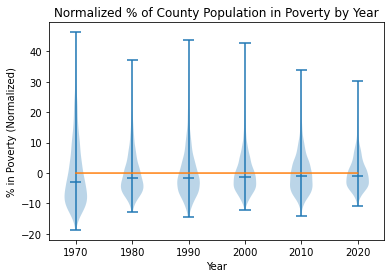

In [19]:
norm_pov_per_year = []
for index in [1970, 1980, 1990, 2000, 2010, 2020]:
    data_by_year = df.loc[df['Year'] == index]
    arr = data_by_year['Norm_Pov'].values
    norm_pov_per_year.append(arr)

plt = reload(plt)
fig, ax = plt.subplots()
ax.violinplot(norm_pov_per_year, df['Year'].unique(), widths=4, showmeans=False, showmedians=True)
ax.set_xlabel("Year")
ax.set_ylabel("% in Poverty (Normalized)")
ax.set_title("Normalized % of County Population in Poverty by Year")
m, b = numpy.polyfit(list(df['Year'].values), list(df['Norm_Pov'].values), 1)
plt.plot(df['Year'].values, m*(df['Year'].values)+b)

print('Slope: {}'.format(m))

We can now see that the median is centered about zero, and the line of regression is much flatter using the normalized measure of poverty (from a slope of -0.0969 to effectively 0). At this point, we can accept the null hypothosis, and we can compare poverty rates between counties regardless of year.

Now, lets look at education, and it's apparent effect on poverty rates, now that we have normalized them by year. Understanding that it is difficult to plot data using more than 3 metrics (in 3 dimensional space), let's simplify the educational data into two key categories:
-  **HS**: the percetage of county citizens with at most a high school diploma.
- **Uni**: the percentage of county citizens with at least some college.

In [20]:
new_col = numpy.zeros(len(df))
df.insert(6, 'HS', new_col, True)
df.insert(9, 'Uni', new_col, True)

In [21]:
for index, row in df.iterrows():
    df.at[index, 'HS'] = row['less_HS'] + row['eq_HS']
    df.at[index, 'Uni'] = row['less_Uni'] + row['eq_Uni']
df.head(10)

,FIPS Code,State,Name,Year,less_HS,eq_HS,HS,less_Uni,eq_Uni,Uni,Percent_Poverty,Norm_Pov
0,1001,AL,Autauga County,1970,54.8,31.1,85.9,7.7,6.4,14.1,23.70,2.801519
1,1001,AL,Autauga County,1980,40.6,35.2,75.8,12.1,12.1,24.2,16.62,0.825690
2,1001,AL,Autauga County,1990,30.0,32.0,62.0,23.5,14.5,38.0,15.70,-1.017577
3,1001,AL,Autauga County,2000,21.3,33.8,55.1,26.9,18.0,44.9,10.90,-3.273829
4,1001,AL,Autauga County,2010,13.5,35.0,48.5,29.8,21.6,51.4,12.70,-4.534216
5,1001,AL,Autauga County,2020,11.3,31.4,42.7,29.0,28.3,57.3,11.20,-2.557577
6,1003,AL,Baldwin County,1970,59.4,26.7,86.1,7.4,6.5,13.9,22.60,1.701519
7,1003,AL,Baldwin County,1980,39.7,33.7,73.4,14.5,12.1,26.6,16.23,0.435690
8,1003,AL,Baldwin County,1990,26.8,31.8,58.6,24.6,16.8,41.4,14.30,-2.417577
9,1003,AL,Baldwin County,2000,18.0,29.6,47.6,29.3,23.1,52.4,10.10,-4.073829


Technically, having both the HS and Uni columns is unneccissary, since HS = 100 - Uni and Uni = 100 - HS, as they are both percentages that descibe 100% of the population. Since we can effectively eliminate one of our metrics (either Uni or HS), we can plot our points in 2D space:

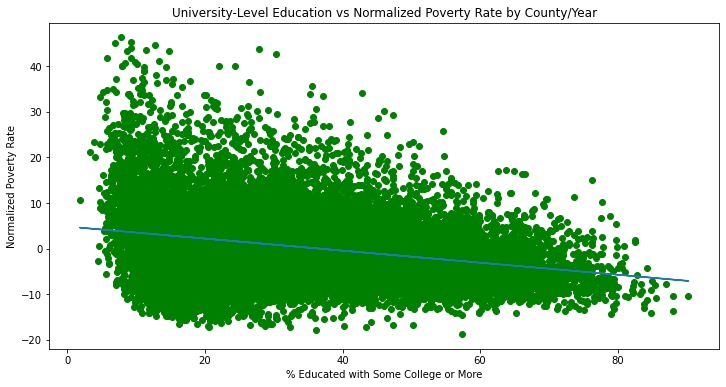

In [22]:
plt = reload(plt)

fig = plt.figure(figsize=(12, 6))
fig = plt.plot(df['Uni'], df['Norm_Pov'], 'o', color='green')
fig = plt.title('University-Level Education vs Normalized Poverty Rate by County/Year')
fig = plt.ylabel('Normalized Poverty Rate')
fig = plt.xlabel('% Educated with Some College or More')

a, b = numpy.polyfit(df['Uni'], df['Norm_Pov'], 1)
plt.plot(df['Uni'], a*df['Uni']+b)  

It looks as if a majority high-school-educated population (left side of the x axis) may have extraordinarily high or low rates of poverty. However, as more of the county population becomes college-educated, it appears to be less prone to high levels of poverty.

### 4. Predictive Models #

Lets write a predictive model to see if we can build an accurate way to predict poverty rate from the education of a county based off of:<br>
- Year
- < HS/less_HS
- = HS/eq_HS
- < Uni/less_Uni
- = Uni/eq_Uni

We will start with K-Nearest-Neighbor, since we have several features wherein proximity is important. Also, it is a simpler algorithm than others, like Random Forest, so if we can get an accurate model using a simpler algorithm, that would be ideal.

Firstly, let's import our packages:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Now, let's specify our features:

In [24]:
poverty = df['Percent_Poverty'].values
features = df.drop({'Percent_Poverty', 'FIPS Code', 'State', 'Name', 'HS', 'Uni', 'Norm_Pov'}, axis = 1)

Then, lets split up our data into testing/training data:

In [25]:
train_features, test_features, train_pov, test_pov = train_test_split(features, poverty, test_size = 0.15, random_state = 12)

Now let's train our model! We'll use 45 neighbors, which is the optimal number of neighbors I could achieve after repeating this model with different hyperparameters.

In [26]:
knn = KNeighborsRegressor(n_neighbors = 45)
knn.fit(train_features, train_pov)

KNeighborsRegressor(n_neighbors=45)

And now, let's see how good our trained model is at predicting the test data. We use Mean Squared Error, because we want to punish significant outliers.

In [27]:
knn_predictions = knn.predict(test_features)
knn_error = (knn_predictions - test_pov) ** 2
MSE = knn_error.sum()/len(test_pov)
print('Accuracy (100% - MSE):', (100 - MSE), '%.')

Accuracy (100% - MSE): 74.57819016573166 %.


It looks like our model is accurate roughly 75% of the time. That is decent, but let's see if we can do slightly better with Random Forest:

In [28]:
# Tested initially with 2000 decision trees at 72.973% accuracy-- hyperparameter lowered to improve performance.
forest = RandomForestRegressor(n_estimators = 1000, random_state = 45)
forest.fit(train_features, train_pov)

RandomForestRegressor(n_estimators=1000, random_state=45)

In [29]:
forest_predictions = forest.predict(test_features)
forest_error = (forest_predictions - test_pov) ** 2
MSE = forest_error.sum()/len(test_pov)
print('Accuracy (100% - MSE):', (100 - MSE), '%.')

Accuracy (100% - MSE): 72.82697136640749 %.


The best accuracy I could get for the Random Forest was 72.973%, using 2000 decision trees (which took quite a while to run). Judging by the accuracy of both models, it seems my intuition was correct: both in terms of accuracy and performance time, K-Nearest-Neighbor is best for predicting this model.

### 5. Conclusion #

To recap our findings: We determined, after seeing that the rates of poverty on the county/year level are skewed to the right, with a few select counties reporting very high rates of poverty, that median is the best measure of central tendency. From looking at the median of the distributions as they changed from year to year, we decided to reject the null hypothesis that year doesn't influence poverty data, and made a normalized column which put a county's rate of poverty for a given year from the perspective of the yearly average rate of poverty. Then we displayed a scatter plot of the normalized poverty rates based on the percent of citizens in a county which attended at least some college (in other words, the percentage of citizens who don't only have at most a high school diploma). Finally, we tried two different predictive models to be able to predict poverty rate from educational data, and determined that K-Nearest-Neighbor was the most effective tool at ~75% accuracy, using Mean Squared Error.<br>
Looking at the normalized scatter plot in part 3, we can infer some relationship between education and rates of poverty. It seems that an only high-school-educated county can experience either high or low levels of poverty. While these counties are slightly more predisposed for higher poverty rates, some counties with little to no college education have some of the lowest rates of poverty. Additionally, the counties which boast the lowest rates of poverty aren't the counties with the highest rates of college education, but the ones with close to a 50-50 balance between college-educated citizens and high-school-educated citizens. In conclusion, a county can best protect itself from poverty by attempting to educate most of it's citizens on the college level, however a balance between college-educated citizens and high-school-educated citizens has the potential for extremely low rates of poverty.